In [1]:
import sys
import os
sys.path.append("..")

import torch
import torchvision.transforms as transforms
from src.datasets.coco import CocoDetection
from src.utils.collate_fn_coco import collate_fn_coco
from src.utils.get_model_and_data import get_model_and_data
import clip
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parameter = {'device': 'cuda'}
model, datasets = get_model_and_data(parameter)

loading annotations into memory...
Done (t=16.43s)
creating index...
index created!
loading annotations into memory...
Done (t=1.06s)
creating index...
index created!
train set scale: 21391
loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
val set scale: 925


In [26]:
dataloader = torch.utils.data.DataLoader(datasets['train'], batch_size=10, shuffle=True, 
                                         collate_fn=collate_fn_coco)

batch = next(iter(dataloader))
print(batch['clip_images'].shape)
print(batch.keys())

for k in batch.keys(): 
    if torch.is_tensor(batch[k]): batch[k] = batch[k].to('cuda')

# model(batch)

torch.Size([10, 3, 224, 224])
dict_keys(['clip_images', 'clip_texts', 'bboxs', 'cat_name', 'cat_id', 'masks'])


In [ ]:
assert False

In [36]:
clip_model = model.clip_model

coco_train = datasets['train']
coco_val = datasets['val']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

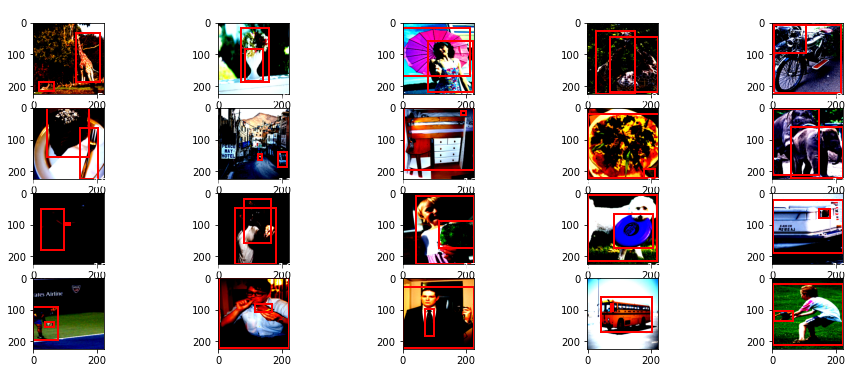

In [47]:
to_pil_image = transforms.ToPILImage()

img_num = 0
plt.figure(figsize=(16, 6))

for i in range(img_num, img_num+20):
    plt.subplot(4,5,i-img_num+1)
    plt.imshow(coco_train[i][0].permute(1,2,0))
    plt.title(f'img_num: {i}', color='white')
    for obj in coco_train[i][1]:
        [bbox_x, bbox_y, bbox_w, bbox_h] = obj['bbox']
        plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                          fill=False, edgecolor='r', linewidth=2))
#     print('\n'.join(coco_train[i][2]))
    
# plt.subplot(2,2,2)
# plt.imshow(coco[img_num][0].permute(1,2,0))
# plt.title('clip_pre with resize', color='white')
# for obj in coco[img_num][1]:
#     [bbox_x, bbox_y, bbox_w, bbox_h] = obj['bbox']
#     plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
#                                       fill=False, edgecolor='r', linewidth=2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

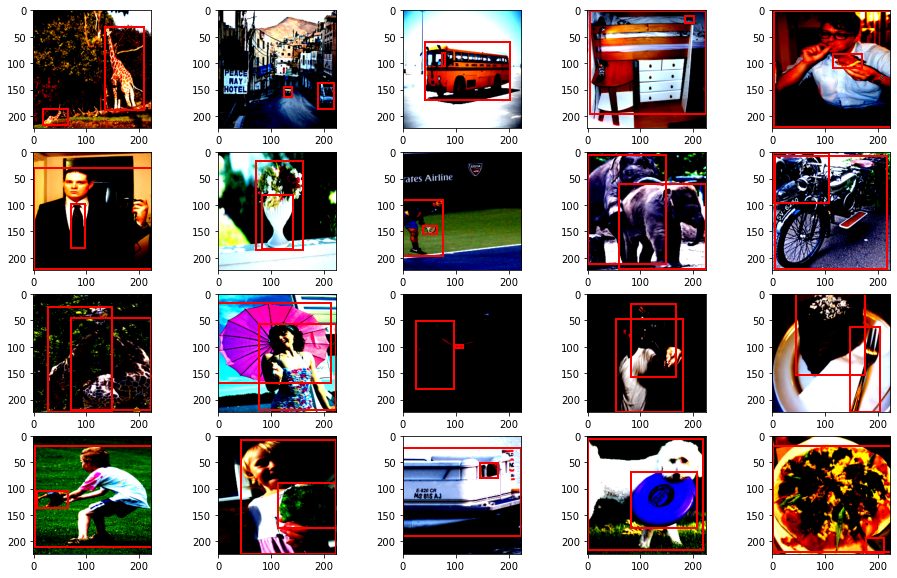

In [58]:
over_fit_set = []
for i in range(20):
    over_fit_set.append(coco_train[i])
    
over_fit_loader = torch.utils.data.DataLoader(over_fit_set, batch_size=20, shuffle=True, collate_fn=collate_fn_coco)

plt.figure(figsize=(16,10))
batch = next(iter(over_fit_loader))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(batch['clip_images'][i].permute(1,2,0))
    for j in range(batch['bboxs'].shape[1]):
        [bbox_x, bbox_y, bbox_w, bbox_h] = batch['bboxs'][i][j]
        plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                          fill=False, edgecolor='r', linewidth=2))

In [ ]:
img_id = coco.ids[0]
# coco.coco.loadAnns(coco.coco.getAnnIds(img_id))
coco[0][1][0]['category_name']

In [ ]:
coco[0][2]

In [ ]:
data_loader = torch.utils.data.DataLoader(coco, batch_size=3, shuffle=False, collate_fn=collate_fn_coco)

batch = next(iter(data_loader))
# dict_keys(['clip_images', 'clip_texts', 'bboxs', 'cat_name', 'cat_id', 'masks'])
batch['cat_name']

In [ ]:
data_loader = torch.utils.data.DataLoader(coco, batch_size=2, shuffle=True, collate_fn=collate_fn_coco)

num_image = 2
plt.figure(figsize=(16,10))
for batch in data_loader:    
    for i in range(num_image):
        plt.subplot(2,2,i+1)
        plt.imshow(batch['clip_images'][i].permute(1,2,0).cpu())
        
        for j in range(batch['bboxs'].shape[1]):
            [bbox_x, bbox_y, bbox_w, bbox_h] = batch['bboxs'][i][j]
            plt.gca().add_patch(plt.Rectangle((bbox_x*224, bbox_y*224), bbox_w*224, bbox_h*224, 
                                              fill=False, edgecolor='r', linewidth=2))
        
        print(batch['cat_name'][i])
        plt.title('\n'.join(batch['clip_texts'][i]), color='white')
        
    break